МФТИ ФИВТ: Курс Машинное Обучение (осень, 2016), Алексей Романенко, alexromsput@gmail.com

**Дополнительный материал для выполнения дз**:
- Лукишн Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов. Финансы и статистика. 2003, главы 1,4,5,7.
- Магнус Я.Р., Катышев П.К., Пересецкий А.А. Эконометрика. Начальный курс., глава 11

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2016_fall <номер_группы> <фамилия>``, к примеру -- ``ML2016_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb``, к примеру -- ``ivanov_401_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2016_fall Question <Содержание вопроса>``

--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было 

<h1 align="center">Check Questions</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1**: Опишите, как изменяется адаптивная способность алгоритма ЭСС при изменении параметра $\alpha$ от 0 до 1.

Когда $\alpha$ ближе к 1, с большим весом входят последние значения. Когда $1 - \alpha$ ближе к 1, то количество значений с относительно большим весом увеличивается.

**Вопрос 2**: Каким следует выбрать параметр сглаживания тренда $\alpha_2$ в модели Хольта (линейный тренд) в случае, когда вы предсказываете временной ряд 1) с плавно меняющимя трендом; 2) стохастически меняющися трендом?

1) использовать меньшие значения $\alpha_2$, так как можно сильно сглаживать тренд

2) использовать большие значения $\alpha_2$, так как при стохастически меняющемся тренде сильное сглаживание может навредить и не поймать развороты тренда.

**Вопрос 3**: Выпишите формулу временного ряда, соответствующих следующим ARIMA моделям
  
  1) ARIMA $(p=0,q=1,d=s)$
  
  2) ARIMA $(p=0,q=s+1,d=1)(P=1, Q=0, D=1)_m$

1) $(1-B)^sy_t = c + (1 + \theta_1 B)e_t$

$$y_t = c + \sum_{i = 1}^{s} \binom{s}{i} (-1)^i y_{t-i} + e_t + \theta_1 e_{t-1}$$

2) $(1-\psi B^m)(1-B)(1-B^m)y_t = c + (1 + \sum_{i=1}^{s+1}\theta_iB^i)e_t$

$(1-B-\psi B^m+\psi B^{m+1})(1-B^m) = 1-B-(1+\psi)B^m+(1+\psi)B^{m+1}+\psi B^{2m}-\psi B^{2m+1}$

$$y_t = y_{t-1} + (1+\psi)y_{t-m} - (1+\psi)y_{t-m-1} - \psi y_{t-2m} + \psi y_{t-2m-1} + c + (e_t + \sum_{i=1}^{s+1}\theta_i e_{t-i})$$

**Вопрос 4**:  Приведите пример такой модели типа ЭС (экспоненциальное сглаживание), которой нет эквивалента среди семейства ARIMA. 

Когда шаг сглаживания зависит от ошибки на данном моменте времени.

**Вопрос 5**:  В чем принципиальное отличие между адаптивной композицей и адаптивной селективной моделью прогнозирования?
В какие случаях предполчительнее использовать адаптивную селекцию нежели адаптивную композцию?

В селекции выбираются наилучшие модели и берется их композиция, в композиции - у моделей есть веса, которые изменяются в процессе обучения.

**Вопрос 6**: Что такое hold-out период и out-of-sample период?

holdout это валидиационная выборка для model selection, а out-of-sample -- это выборка для проверки финальной модели, причем выборки должны непересекаться во времени, и out-of-sample должна быть поздее holdout, а holdout позднее train

** Вопрос 7**: Опишите, что такое автокорреляционная функция и частная автокорреляционная функция.
Зачем они нужны?

Атвокорреляционная функция в точке k -- корреляция между $\{y_t\}$ и $B^k\{y_t\}$

Частичная автокорреляционная функция -- это частичная корреляция (https://en.wikipedia.org/wiki/Partial_correlation) между $\{y_t\}$ и $B^k\{y_t\}$ с учетом промеждуточных $B, \dots, B^{k-1}$ от $\{y_t\}$.

Используются для выбора параметров в модели ARIMA

-----------
PS: Если проверяющий не понял ответ на большинство вопросов, то будет пичалька. Пишите так, чтобы можно было разобраться. 

<h1 align="center">Оценка точности моделей прогнозирования</h1> 

Задача 1

    Приведите пример временного ряда и модели прогнозирования, когда оценка точности прогнозирования на hold-out (validation set) периоде будет завышена по сравнению с точностью на периоде out-of-sample (test Set).

Модель Холта с линейным трендом, тренд постоянный на train, holdout, но резко меняется на test

<h1 align="center">Реализация модели Уинтерса</h1>
Нужно реализовать модель Уинтерса c аддитивныой сезонностью, применить её для прогнозирования временных рядов


<h2 align="left">Анализ временных рядов</h2>

* Отобразите интегральные продажи в departure 36 и убедитесь, что нет чёткой выраженной сезонности.
* Чему равен минимальный период сезонности во временных рядах departre 42?
* Чётко ли видна сезонность в интегральных продажах для departure 6?

#### Данные
    * TS_dep36.csv - временные ряды продаж в departure 36 (только ряды с сезонной компонентой)
    * TS_dep42.csv - врeменные ряды продаж в departure 42 (только ряды без сезонности)
    * TS_dep6.csv - как сезонные, так и НЕсезонные временные ряды продаж в departure 6

In [1]:
import pandas as pd
import numpy as np
from utils import qualityRMSE, qualityMedianAE
from utils import ExponentialSmoothing
import matplotlib.pyplot as plt

%matplotlib inline

def read(file, decimal):
    return pd.read_csv(file, sep=';', decimal=decimal, index_col=0, parse_dates=True, dayfirst=True)

ts36 = read('./data/TS_dep36.csv', decimal=',')
ts42 = read('./data/TS_dep42.csv', decimal='.')
ts6 = read('./data/TS_dep6.csv', decimal='.')


# Постройте несколько картинок для каждого из departure, чтобы ответить на вопросы


ts = ts6

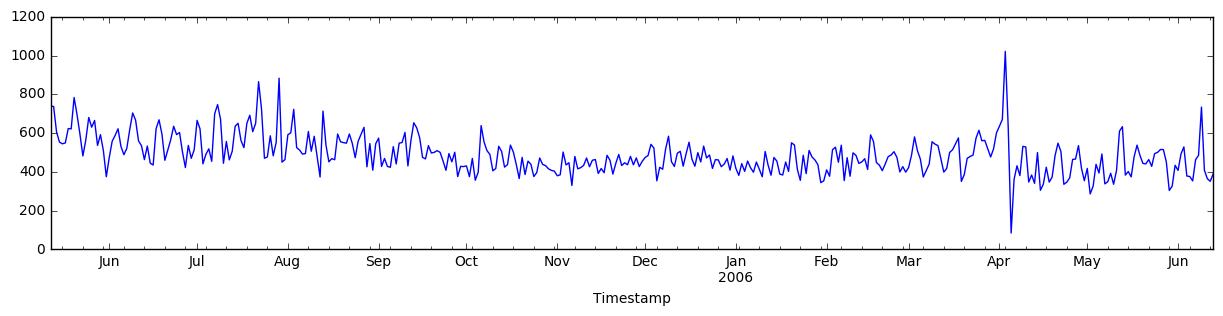

In [2]:
ts36.sum(axis=1).plot(figsize=(15,3))

Сезонности нет.

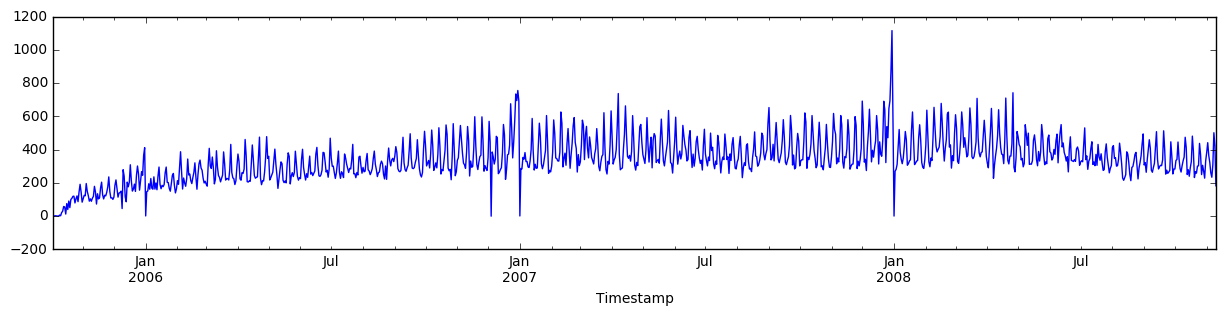

In [3]:
ts42.sum(axis=1).plot(figsize=(15, 3))

Сезонность есть.

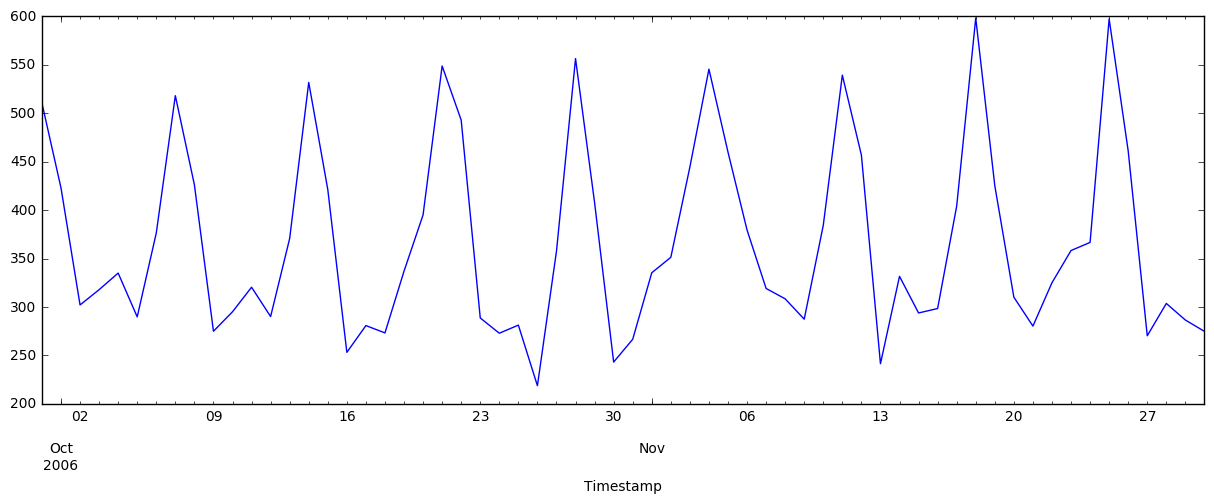

In [4]:
ts42.sum(axis=1)['2006-09-30':'2006-11-30'].plot(figsize=(15,5))

Минимальный период сезонности -- 7 дней.

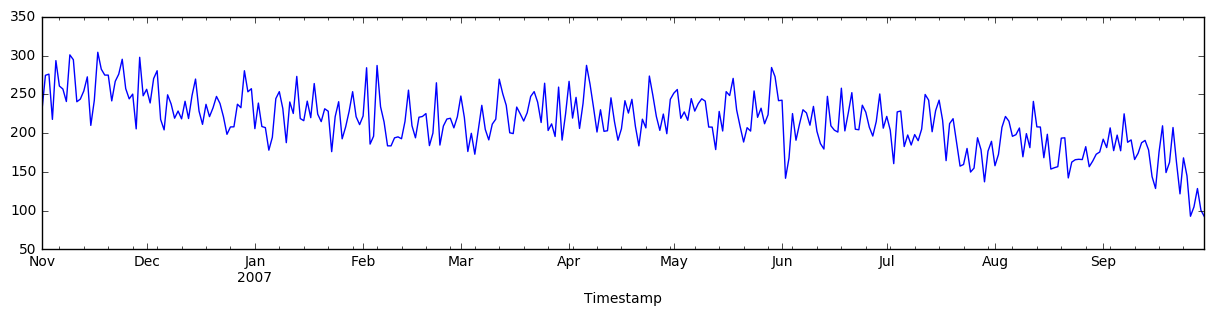

In [5]:
ts6.sum(axis=1).plot(figsize=(15, 3))

Сезонность выражена нечетко.

In [6]:
# Winters Exponential Smoothing
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    delts <scalar in [0,1]> - seasonality smoothing parameter
import math

def WintersExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    delta = Params['delta']
    s = Params['seasonality_period']
    FORECAST = [np.nan]*(T+h)
    a = 0
    b = np.zeros(s)
    for t in range(T):
        try:
            isnotnone = not math.isnan(x[t])
        except:
            isnotnone = False
        if isnotnone:
            
            a_old = a
            a = alpha * (x[t]-b[t % s]) + (1-alpha) * a_old
            b[t % s] = delta * (x[t]-a_old) + (1-delta) * b[t % s]

            #else do not nothing
        FORECAST[t+h] = a + b[(t+h-1) % s]
            
    return FORECAST

<h2 align="left">Проверка на адеквантность</h2>

* Проверку лучше всего проводить на данных для departure 6
* Постройте картинку по соответствию суммы прогнозов сумме значений всех временных рядо
* Оцените интегральную точность предсказаний на всех временных рядах по всей истории по qualityMedianAE: ошибка не должна быть сильно больше, чем среднеe значение одного временного ряда 

In [7]:
from datetime import timedelta
h = 1
rng = pd.date_range(ts.index[-1]+timedelta(1), ts.index[-1]+timedelta(h))

w_frc_ts = pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)
#     Quality = [np.NaN]*len(ts)
for cntr in ts.columns:
    w_frc_ts[cntr] = WintersExponentialSmoothing(ts[cntr], h, {'alpha':0.6, 'delta': 0.6, 'seasonality_period': 7})
    

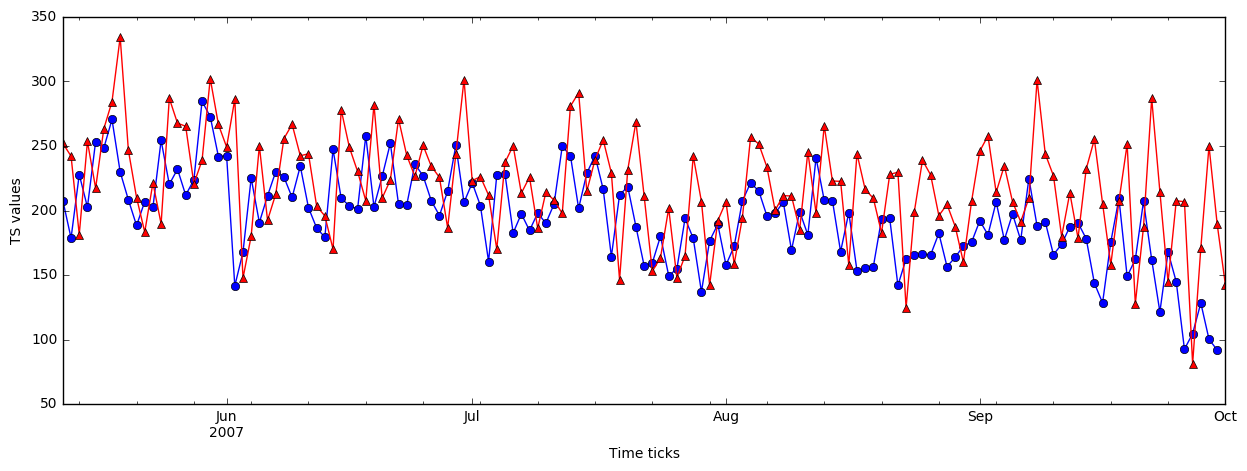

In [8]:
# Визуальная проверка прогноза на адекватность
ts_num = 0
ts.sum(axis=1).ix['2007-05-12':'2008-06-01'].plot(style='b', linewidth=1.0, marker='o')
w_frc_ts.sum(axis=1).ix['2007-05-12':'2008-06-01'].plot(style='r-^', figsize=(15,5), linewidth=1.0)
plt.xlabel("Time ticks")
plt.ylabel("TS values")
# plt.legend()

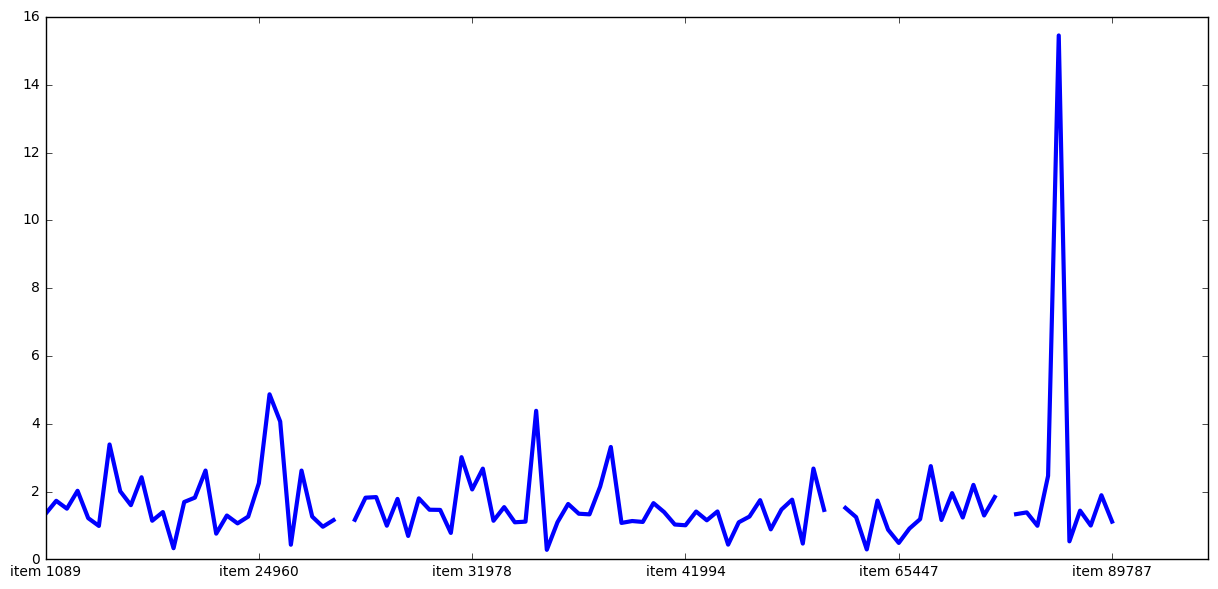

In [9]:
# анализ точности предсказаний
# Quality through 1500 steps
ix = range(len(ts.index))
QualityStr = qualityMedianAE(ts.ix[ix], w_frc_ts.ix[ix])[0]


QualityStr.plot(figsize = (15,7), linewidth=3.0)

Для последнего объекта есть выброс в качестве, но для остальных все нормально.

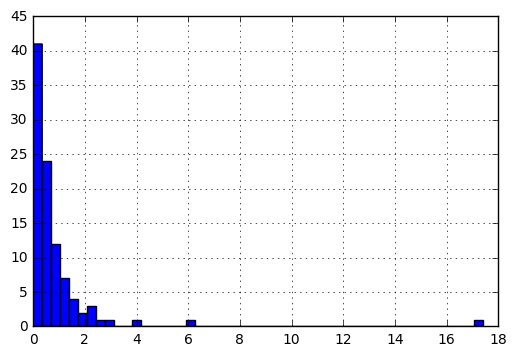

In [10]:
# Сравните точность предсказаний по каждому временному ряду с его средним значением
diffs = pd.Series(index=QualityStr.index)
for col in QualityStr.index:
    diffs[col] = np.abs(QualityStr[col]-ts[col].mean())
diffs.hist(bins=50)

<b>Аналогично, есть несколько выбросов, но для остальных вполне ок.</b>

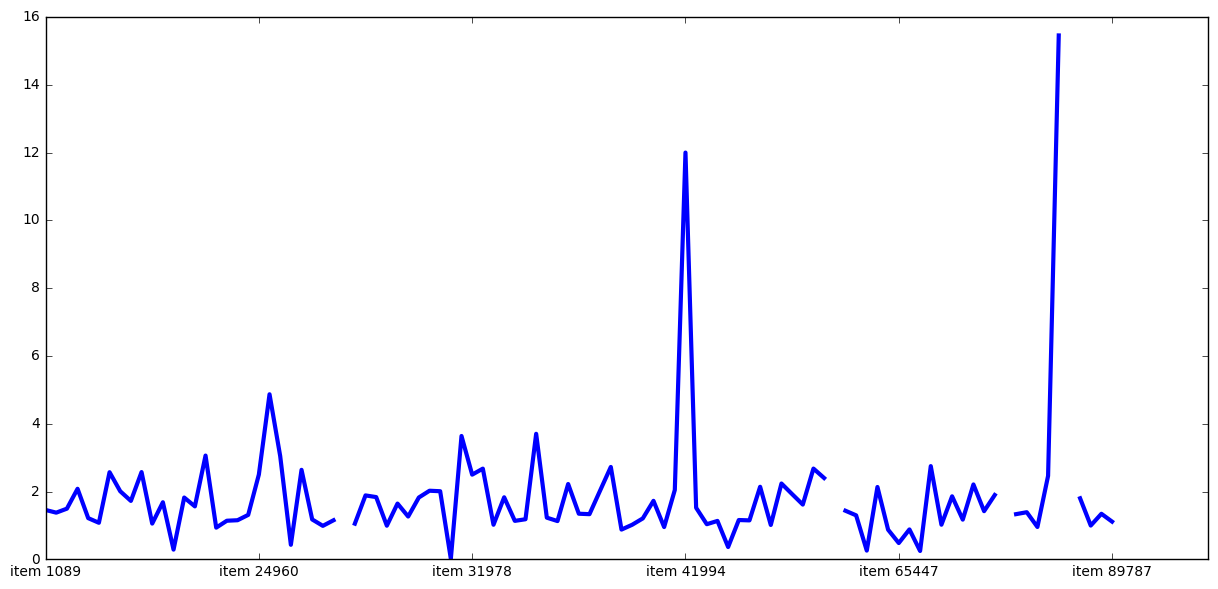

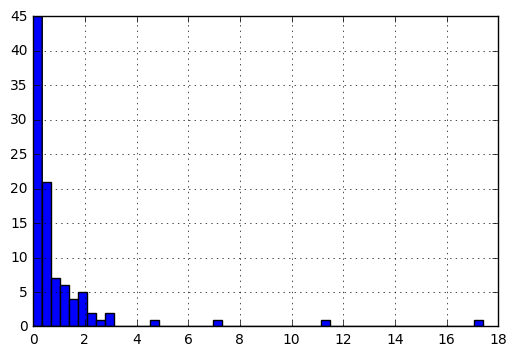

In [11]:
# Оцените точность предсказаний на первых 100 отсчётах каждого временного ряда
ix = range(100)
QualityStr = qualityMedianAE(ts.ix[ix], w_frc_ts.ix[ix])[0]
QualityStr.plot(figsize = (15,7), linewidth=3.0)
plt.show()
diffs = pd.Series(index=QualityStr.index)
for col in QualityStr.index:
    diffs[col] = np.abs(QualityStr[col]-ts[col].mean())
diffs.hist(bins=50)
plt.show()

In [29]:
# подберите оптимальное значение параметров \alpha и \delta на данных по departure 36
def error(ts, w_frc_ts):
    QualityStr = qualityMedianAE(ts.sum(axis=1), w_frc_ts.sum(axis=1))[0]
    return QualityStr

scores = {}
for alpha in [0.1, 0.3, 0.5]:
    for delta in [0.1, 0.3, 0.5]:
        rng36 = pd.date_range(ts36.index[-1]+timedelta(1), ts36.index[-1]+timedelta(h))
        w_frc_ts = pd.DataFrame(index = ts36.index.append(rng36), columns = ts36.columns)
        for i, col in enumerate(ts36.columns):
            w_frc_ts[col] = WintersExponentialSmoothing(ts36[col], h, {'alpha':alpha, 'delta':delta, 'seasonality_period':7})
        score = error(ts36, w_frc_ts)
        print("alpha={} delta={} score {}".format(alpha, delta, score))
        scores[(alpha, delta)] = score
print(scores)

alpha=0.1 delta=0.1 score 51.04440002869762
alpha=0.1 delta=0.3 score 49.78613450709793
alpha=0.1 delta=0.5 score 52.017815884763195
alpha=0.3 delta=0.1 score 49.930850427423024
alpha=0.3 delta=0.3 score 50.74017156609085
alpha=0.3 delta=0.5 score 49.29058679473576
alpha=0.5 delta=0.1 score 50.70355531830978
alpha=0.5 delta=0.3 score 52.3481140889827
alpha=0.5 delta=0.5 score 55.64099999999996
{(0.3, 0.1): 49.930850427423024, (0.3, 0.5): 49.29058679473576, (0.1, 0.5): 52.017815884763195, (0.5, 0.1): 50.70355531830978, (0.3, 0.3): 50.74017156609085, (0.5, 0.3): 52.3481140889827, (0.1, 0.1): 51.04440002869762, (0.1, 0.3): 49.78613450709793, (0.5, 0.5): 55.64099999999996}


In [13]:
a_opt, d_opt = 0.3, 0.5

<h2 align="left">Сравнение с простым экспоненциальным сглаживанием</h2> 

* Сравните точность предсказаний по реализованной модели Уинтерса с точностью предсказаний простого экспоненциального сглажвания с alpha=0.1, AdaptationPeriod = 10
       - на данных по departure 42
       - на данных по departre 6

  Замечание1: оптимальные параметры для модели Уинтерса подобраны на предыдущем шаге
  Замечания2: quality function для оценки точности выберите сами
  
* Сравнивая точность прогнозов простого ЭС и прогнозов модели Уинтерса, определите для каждого ряда departre 6 обладает ли он сезонной компонентой или нет. Выпише номер сезонных временных рядов

In [14]:
def pairwise_quality(ts, seasonality_period):
    rng = pd.date_range(ts.index[-1]+timedelta(1), ts.index[-1]+timedelta(h))
    w_frc_ts = pd.DataFrame(index=ts.index.append(rng), columns=ts.columns)
    es_frc_ts = pd.DataFrame(index=ts.index.append(rng), columns=ts.columns)
    for col in ts.columns:
        w_frc_ts[col] = WintersExponentialSmoothing(ts[col], h, {'alpha': a_opt,
                                                                 'delta': d_opt,
                                                                 'seasonality_period':seasonality_period})
        es_frc_ts[col] = ExponentialSmoothing(ts[col], h, {'alpha':0.1, 'AdaptationPeriod': 10})
    return qualityMedianAE(w_frc_ts.sum(axis=1), ts.sum(axis=1))[0], qualityMedianAE(es_frc_ts.sum(axis=1), ts.sum(axis=1))[0]



Импортируем код из utils.py прямо в ноутбук

In [19]:
import os
import numpy as np
import math

# Quality functions
def qualitySSE(x,y):
    # Sum squared error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    return ((x-y)**2).sum(), (x-y)**2

def qualityMSE(x,y):
    # Mean squared error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    return ((x-y)**2).mean() , (x-y)**2

def qualityRMSE(x,y):
    # Root mean squared error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    return (((x-y)**2).mean())**(0.5) , (x-y)**2

def qualityMAE(x,y):
    # Mean absolute error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    return (x-y).abs().mean(), (x-y).abs()

def qualityMAPE(x,y):
    # Mean absolute percentage error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    qlt = ((x-y).abs()/x).replace([np.inf, -np.inf], np.nan)
    return qlt.mean() , (x-y).abs()

def qualityMACAPE(x,y):
    # Mean average corrected absolute percentage error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    qlt = (2*(x-y).abs()/(x+y)).replace([np.inf, -np.inf], np.nan)
    return qlt.mean() , (x-y).abs()

def qualityMedianAE(x,y):
    # Median absolute error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    return ((x-y).abs()).median(), (x-y).abs()

def ExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    AdaptationPeriod=Params['AdaptationPeriod']
    FORECAST = [np.NaN]*(T+h)
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        #alpha = 1
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    y = x[0]
    t0=0
    for t in range(0, T):
        if not math.isnan(x[t]):
            if math.isnan(y):
                y=x[t]
                t0=t
            if (t-t0+1)<AdaptationPeriod:
                y = y*(1-alpha*(t-t0+1)/(AdaptationPeriod)) + alpha*(t-t0+1)/(AdaptationPeriod)*x[t]
            y = y*(1-alpha) + alpha*x[t]
            #else do not nothing
        FORECAST[t+h] = y
    return FORECAST

In [39]:
print(pairwise_quality(ts36, 6))
print(pairwise_quality(ts36, 7))
print(pairwise_quality(ts36, 8))

(50.40215222407778, 52.81852967312875)
(49.29058679473576, 52.81852967312875)
(53.31641247172092, 52.81852967312875)


In [47]:
good_cols = []
for col in ts6.columns:
    qual = pairwise_quality(ts6[[col]], 7)
    print("col {} qual {} {}".format(col, *qual))
    if (qual[0] < qual[1] - 0.1):
        good_cols.append(col)

col item 1089 qual 1.119302926206276 1.1275123655406343
col item 10960 qual 1.6885038428650732 1.4426376602722355
col item 1178 qual 1.1906938422737272 1.0245303220846398
col item 11827 qual 1.7521672023432764 1.3469013431520898
col item 1511 qual 1.036519717569712 1.0650497006558006
col item 15934 qual 0.8199757953393034 0.5793791756799351
col item 16368 qual 3.1868405738318466 2.7890593404066237
col item 17248 qual 1.3964983999999996 1.6064584293986064
col item 18232 qual 1.3943857672356135 1.1443218934385464
col item 18291 qual 1.8816038570549964 1.955727090797789
col item 19924 qual 0.9271961235681556 0.8531307957547011
col item 21275 qual 1.2766792791108021 1.0604587885979013
col item 21496 qual 0.24676743837736595 0.23268992067097685
col item 2171 qual 1.3421336178166614 1.1827765381952657
col item 2173 qual 1.4830079010990183 1.2838722659870379
col item 22385 qual 2.1205498207960005 1.77328090062199
col item 23367 qual 0.6639447797819877 0.6731428785171488
col item 24101 qual 1.

In [48]:
good_cols

['item 17248',
 'item 28560',
 'item 28632',
 'item 29014',
 'item 29428',
 'item 34190',
 'item 34280',
 'item 37419',
 'item 40485',
 'item 40909',
 'item 45097',
 'item 48206',
 'item 66201',
 'item 76722',
 'item 83350',
 'item 89787']

<h1 align="center">Прогнозирование рядов электроэнергии</h1>

<h2 align="left">Данные</h2>
* Временные ряды потребления электроэнергии energy_consumption.csv:
    - целевая переменная - объемы электроэнергии, производимые на электростанции
    - каждый временной ряд соответствует отдельному региону (Hub)
    - временной шаг - день
    - вспомогательные переменные (Temp1, Temp2 - температуры, Sunday, Saturday - разметка праздников, и др)

** Задание**
* Подберите наиболее оптимальные для прогнозирования объёмов электроэнергии параметры модели ARIMAX согласно следующему фреймворку:
     - по временному ряду потребления электроэнергии в регионе 'Center' (брать данные до 01.01.2015) определите наборы возможных значений параметров p, d, q (около 3-5 вариантов для каждого параметра)
         
     - путем перебора значений параметров из предыдущего шага и добавляя или не добавляя все экзогенные переменные ("Temp1", "Temp2", "Saturday", "Sunday") определите оптимальную концигурацию параметров. В качестве hold-out пеприода использовать период с 01.01.2015 по 30.04.2015.

In [871]:
!pip install statsmodels

    100% |████████████████████████████████| 7.0MB 162kB/s 
    100% |████████████████████████████████| 235kB 986kB/s 
  Running setup.py bdist_wheel for statsmodels ... - \ | / - \ | / - \ | / - \ | / done
  Stored in directory: /Users/astepanov/Library/Caches/pip/wheels/38/d3/1e/94a59b1460b3249b15399e09dae7a3828045bcf830d999b4b1
Successfully built statsmodels
You are using pip version 9.0.0, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [22]:
import statsmodels.api as sm
from scipy import stats

In [23]:
# считайте данные energy_consumption в структуру pandas
energy_ts = pd.read_csv('./data/energy_consump.csv', sep=',', decimal='.', parse_dates=True, dayfirst=True, index_col='Date')
energy_ts.index.names=['Timestamp']

In [56]:
#  выделите периоды для настройки параметров, для выбора лучшей модели, для оценки точности
train_ts = energy_ts[energy_ts.index<'2015-01-01']
valid_ts = energy_ts[energy_ts.index<'2015-05-01']
extra_ts = energy_ts[energy_ts.index>='2015-05-01']


# для train и validation нужно исключить NaN
train_ts[['EnergyConsump','Temp1', 'Temp2', 'Saturday','Sunday']].dropna(inplace = True)
valid_ts[['EnergyConsump','Temp1', 'Temp2', 'Saturday','Sunday']].dropna(inplace = True)

# для extra_ts NaN в экзогенных переменных нужно заменить на последнее не NaN значение
extra_ts[['EnergyConsump','Temp1', 'Temp2', 'Saturday','Sunday']].fillna(method='ffill')


/Users/astepanov/.virtualenvs/tf/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/astepanov/.virtualenvs/tf/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,EnergyConsump,Temp1,Temp2,Saturday,Sunday
Timestamp,,,,,
2015-05-01,140054.025,8.2,5.1,0.0,1.0
2015-05-02,139146.556,7.5,4.9,1.0,0.0
2015-05-03,139743.874,6.5,2.7,0.0,1.0
2015-05-04,138947.169,7.5,3.1,0.0,1.0
2015-05-05,148874.643,8.8,5.4,0.0,0.0
2015-05-06,147576.349,16.0,10.6,0.0,0.0
2015-05-07,147022.019,15.1,11.2,0.0,0.0
2015-05-08,145096.536,10.5,9.6,0.0,0.0
2015-05-09,135096.565,8.0,7.9,1.0,0.0


<h2 align="left">Выбор значений параметров p, q, d</h2>

In [57]:
# Данные для региона Center
dta = train_ts[(energy_ts['ZSP']=='FZSZOE27') & (energy_ts['Hub']=='Center')]

/Users/astepanov/.virtualenvs/tf/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [58]:
dta.head()

,Hub,ZSP,EnergyConsump,Temp1,Temp2,Temp3,Temp4,Temp5,Temp6,Temp7,Saturday,Sunday,Temp1_South_Less,Temp2_South_Less,Temp3_South_Less,Temp4_South_Less,Temp1_South_Gr,Temp2_South_Gr,Temp3_South_Gr,Temp4_South_Gr
Timestamp,,,,,,,,,,,,,,,,,,,,
2010-01-01,Center,FZSZOE27,147487.171,-17.8,-16.9,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-02,Center,FZSZOE27,155433.800,-17.8,-20.3,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-03,Center,FZSZOE27,164140.232,-16.4,-24.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,Center,FZSZOE27,171382.848,-10.2,-15.7,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,Center,FZSZOE27,170188.290,-7.2,-8.8,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


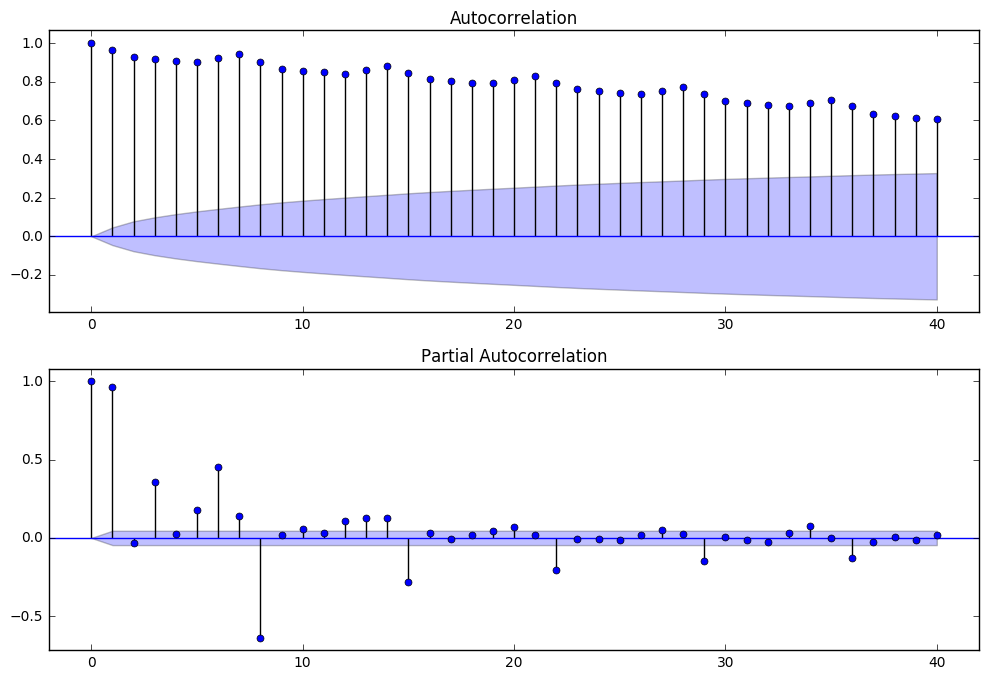

In [52]:
# Проанализируйте:  автокорреляционной функции (ACF) и частной коррелационной функции (PACF) для исходного временного ряда
# Стационарен ли он?
# Если нет, тогда постройте ARIMA модель с d>0, глядя на ACF и PACF регрессионных остатков модели ARIMA, примите решение, стоит ли увеличивать d

# Use energy data
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.EnergyConsump, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta.EnergyConsump, lags=40, ax=ax2)

<b> Из-за того, что коэффициенты автокорреляционной функции убывают слишком медленно, ряд не стационарен, поэтому построим ARIMA модель с d>0 (например, d=1), глядя на ACF и PACF регрессионных остатков модели ARIMA

In [63]:
arima = sm.tsa.ARIMA(dta.EnergyConsump, (1,1,1)).fit()

Вот, так лучше. Есть выбросы, но это из-за сезонности, так что все ок.

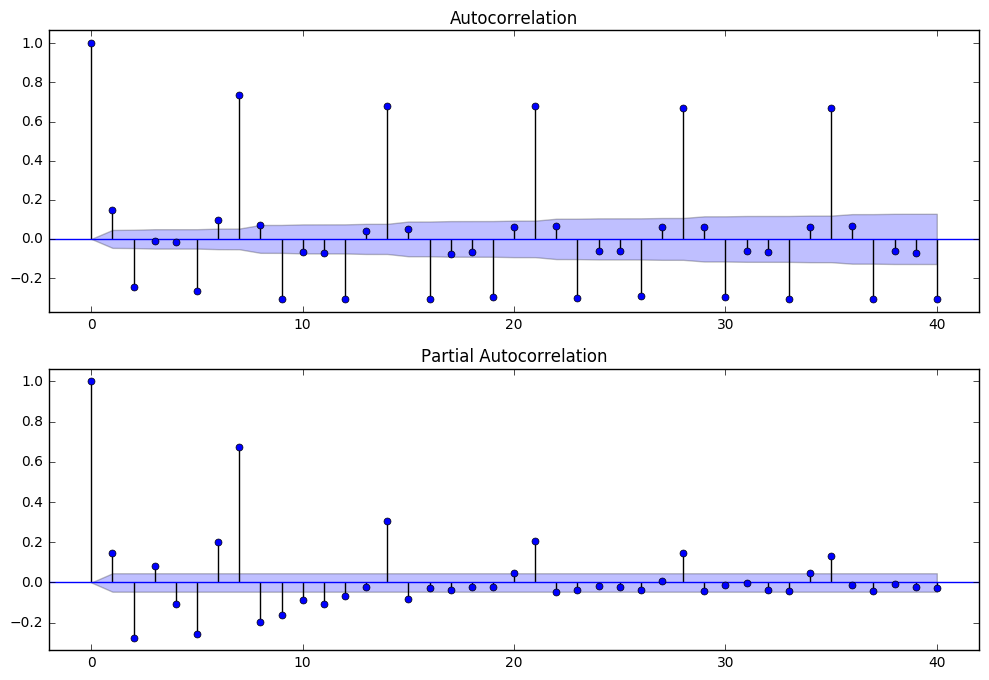

In [66]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arima.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arima.resid, lags=40, ax=ax2)

<h1 align="center">Bonus part</h1> 

Это удвоит баллы за дз.

- Реализуйте алгоритм адаптивной селекции или адаптивной композиции  
- Подберите параметры реализованной композиции так, чтобы для данных из departure 6 прогноз композии был точнее, чем прогноз отдельного базового алгоритма на всех временных рядах 